In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-14 17:11:40.729518: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
load_img

<function keras.utils.image_utils.load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest', keep_aspect_ratio=False)>

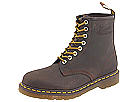

In [5]:
path = './soft-footies-dataset/train/boot'
name = 'boot (10).jpg'
fullname = path + '/' + name
load_img(fullname)

## Pre-trained convolutional neural networks

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input 
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-14 17:11:43.297104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 17:11:43.304462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 17:11:43.305123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 17:11:43.306048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [8]:
img = load_img(fullname, target_size=(299, 299))

In [9]:
x = np.array(img)

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
X = np.array([x])

In [12]:
X.shape


(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

2023-11-14 17:11:46.790084: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-14 17:11:47.471458: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-14 17:11:47.472102: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-14 17:11:47.472145: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-14 17:11:47.472675: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-14 17:11:47.472755: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [15]:
pred.shape

(1, 1000)

In [16]:
pred[0, :3]

array([0.0004317 , 0.00014199, 0.00013171], dtype=float32)

In [17]:
 decode_predictions(pred)

[[('n03124043', 'cowboy_boot', 0.40005696),
  ('n03680355', 'Loafer', 0.12027443),
  ('n03047690', 'clog', 0.035609502),
  ('n04254777', 'sock', 0.027329728),
  ('n03026506', 'Christmas_stocking', 0.015539569)]]

## Transfer learning

* Instead of loading each image one-by-one, we can use a data generator ImageDataGenerator. Keras will use it for loading the images and pre-processing them
* Train Xception on smaller (150 x 150)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [20]:
image_size = (299, 299)
batch_size = 32

In [21]:
train_ds = train_gen.flow_from_directory(
    "soft-footies-dataset/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 12004 images belonging to 3 classes.


In [22]:
X, y = next(train_ds)

In [23]:
X.shape

(32, 299, 299, 3)

In [24]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [25]:
 val_ds = val_gen.flow_from_directory(
    "soft-footies-dataset/validation",
    target_size=image_size,
    batch_size=batch_size,
     
)

Found 1496 images belonging to 3 classes.


In [26]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3)
    
)

base_model.trainable = False 

In [27]:
inputs = keras.Input(shape=(299, 299, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(3)(vector)

model = keras.Model(inputs, outputs) 

In [28]:
learning_rate = 0.01


optimizer = keras.optimizers.Adam(learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(
    optimizer=optimizer, 
    loss=loss, 
    metrics=["accuracy"]
)


In [29]:
# model.fit(train_ds, epochs=10, validation_data=val_ds)

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
376/376 [==============================] - 95s 243ms/step - loss: 0.1453 - accuracy: 0.9506 - val_loss: 0.1470 - val_accuracy: 0.9465
Epoch 2/10
376/376 [==============================] - 90s 240ms/step - loss: 0.0766 - accuracy: 0.9738 - val_loss: 0.0956 - val_accuracy: 0.9659
Epoch 3/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0613 - accuracy: 0.9773 - val_loss: 0.0700 - val_accuracy: 0.9726
Epoch 4/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0478 - accuracy: 0.9823 - val_loss: 0.0895 - val_accuracy: 0.9679
Epoch 5/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0412 - accuracy: 0.9853 - val_loss: 0.0880 - val_accuracy: 0.9686
Epoch 6/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0394 - accuracy: 0.9855 - val_loss: 0.0844 - val_accuracy: 0.9706
Epoch 7/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0318 - accuracy: 0.9887 - val_loss: 0.1414 - val_ac

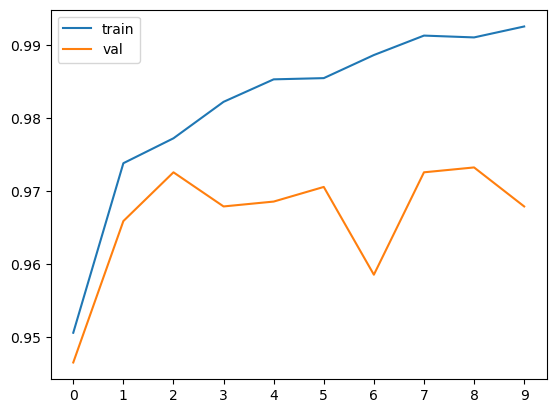

In [31]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Adjusting the learning rate
* What's the learning rate
* Trying different values and see what best for the model

In [32]:
def make_model(learning_rate):
    base_model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False
    )
    
    base_model.trainable = False 
    
    #########################################
    
    inputs = keras.Input(shape=(299, 299, 3))
    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(3)(vector)
    model = keras.Model(inputs, outputs) 

    #########################################
        
    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )
    
    return model

In [33]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
376/376 [==============================] - 94s 243ms/step - loss: 0.5228 - accuracy: 0.8829 - val_loss: 0.4154 - val_accuracy: 0.8583
Epoch 2/10
376/376 [==============================] - 91s 241ms/step - loss: 0.2693 - accuracy: 0.9295 - val_loss: 0.3111 - val_accuracy: 0.8817
Epoch 3/10
376/376 [==============================] - 91s 241ms/step - loss: 0.2082 - accuracy: 0.9393 - val_loss: 0.2630 - val_accuracy: 0.8977
Epoch 4/10
376/376 [==============================] - 91s 241ms/step - loss: 0.1786 - accuracy: 0.9452 - val_loss: 0.2284 - val_accuracy: 0.9158
Epoch 5/10
376/376 [==============================] - 91s 241ms/step - loss: 0.1604 - accuracy: 0.9500 - val_loss: 0.2050 - val_accuracy: 0.9285
Epoch 6/10
376/376 [==============================] - 91s 241ms/step - loss: 0.1481 - accuracy: 0.9522 - val_loss: 0.1920 - val_accuracy: 0.9311
Epoch 7/10
376/376 [==============================] - 91s 241ms/step - loss: 0.1390 - accuracy: 0.9553 - val_loss: 0.1820 -

0.01 is the best learning rate

In [34]:
preds = model.predict(X)


1/1 [==============================] - 1s 684ms/step


In [35]:
del scores[0.001]
del scores[0.0001]

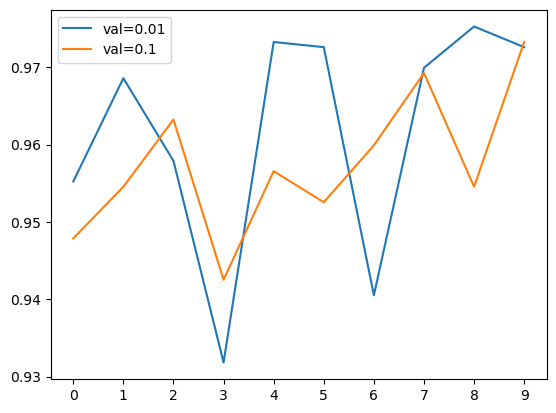

In [36]:
for lr, hist in scores.items():
    
    #plt.plot(hist['accuracy'], label='train=%s' % lr)
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
    
plt.xticks(np.arange(10))
plt.legend()

#best learning_rate is 0.01

# Checkpointing
* saving the best model only
* Training a model with callbacks

In [37]:
model.save_weights('model_v1.h5', save_format='h5')

In [38]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",   
)

In [39]:
learning_rate = 0.01

model = make_model(learning_rate=learning_rate)

model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds, 
    callbacks=[checkpoint]
)

Epoch 1/10
376/376 [==============================] - 94s 244ms/step - loss: 0.1292 - accuracy: 0.9533 - val_loss: 0.1302 - val_accuracy: 0.9532
Epoch 2/10
376/376 [==============================] - 91s 242ms/step - loss: 0.0770 - accuracy: 0.9728 - val_loss: 0.1253 - val_accuracy: 0.9572
Epoch 3/10
376/376 [==============================] - 91s 242ms/step - loss: 0.0575 - accuracy: 0.9798 - val_loss: 0.0926 - val_accuracy: 0.9659
Epoch 4/10
376/376 [==============================] - 91s 242ms/step - loss: 0.0465 - accuracy: 0.9840 - val_loss: 0.1579 - val_accuracy: 0.9459
Epoch 5/10
376/376 [==============================] - 91s 242ms/step - loss: 0.0360 - accuracy: 0.9878 - val_loss: 0.0825 - val_accuracy: 0.9719
Epoch 6/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0373 - accuracy: 0.9865 - val_loss: 0.0731 - val_accuracy: 0.9719
Epoch 7/10
376/376 [==============================] - 91s 242ms/step - loss: 0.0328 - accuracy: 0.9889 - val_loss: 0.0696 - val_ac

# Adding more layers

In [40]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False
    )
    base_model.trainable = False 
    
    #########################################
    
    inputs = keras.Input(shape=(299, 299, 3))
    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(100, activation='relu')(vector)
    outputs = keras.layers.Dense(3)(inner)
    model = keras.Model(inputs, outputs) 

    #########################################
        
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )
    return model


In [41]:
learning_rate = 0.01

scores = {}  

for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
376/376 [==============================] - 94s 243ms/step - loss: 0.1489 - accuracy: 0.9470 - val_loss: 0.1378 - val_accuracy: 0.9492
Epoch 2/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0866 - accuracy: 0.9698 - val_loss: 0.1567 - val_accuracy: 0.9452
Epoch 3/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0668 - accuracy: 0.9769 - val_loss: 0.1054 - val_accuracy: 0.9652
Epoch 4/10
376/376 [==============================] - 91s 242ms/step - loss: 0.0533 - accuracy: 0.9813 - val_loss: 0.0799 - val_accuracy: 0.9693
Epoch 5/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0430 - accuracy: 0.9854 - val_loss: 0.1299 - val_accuracy: 0.9626
Epoch 6/10
376/376 [==============================] - 91s 242ms/step - loss: 0.0425 - accuracy: 0.9855 - val_loss: 0.1031 - val_accuracy: 0.9733
Epoch 7/10
376/376 [==============================] - 91s 241ms/step - loss: 0.0394 - accuracy: 0.9862 - val_loss: 0.1256 - val

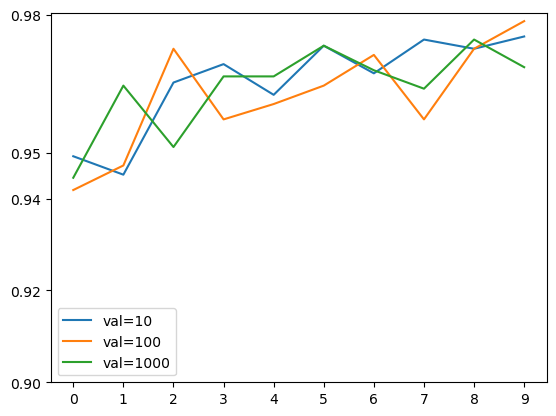

In [42]:
for size, hist in scores.items():
    
    #plt.plot(hist['accuracy'], label='train=%s' % lr)
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.yticks([0.90, 0.92, 0.94, 0.95, 0.98])
plt.legend()

# Regularization and Dropout
* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [43]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False
    )
    base_model.trainable = False 
    
    #########################################
    
    inputs = keras.Input(shape=(299, 299, 3))
    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dense(droprate)(inner)
    outputs = keras.layers.Dense(3)(drop)
    
    model = keras.Model(inputs, outputs) 

    #########################################
        
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=["accuracy"]
    )
    
    return model

In [44]:
learning_rate = 0.01
size = 100

scores = {}  

for droprate in [0.0, 0.2, 0.5]:
    print(droprate)
    
    model = make_model(
        learning_rate=learning_rate, 
        size_inner=size,
        droprate=droprate
    )
    
    history = model.fit(
        train_ds, epochs=10, 
        validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/10
376/376 [==============================] - 94s 243ms/step - loss: 1.0994 - accuracy: 0.3337 - val_loss: 1.0991 - val_accuracy: 0.3316
Epoch 2/10
376/376 [==============================] - 91s 242ms/step - loss: 1.0993 - accuracy: 0.3282 - val_loss: 1.0989 - val_accuracy: 0.3342
Epoch 3/10
376/376 [==============================] - 91s 241ms/step - loss: 1.0995 - accuracy: 0.3316 - val_loss: 1.0986 - val_accuracy: 0.3342
Epoch 4/10
376/376 [==============================] - 91s 242ms/step - loss: 1.0991 - accuracy: 0.3311 - val_loss: 1.1005 - val_accuracy: 0.3342
Epoch 5/10
376/376 [==============================] - 91s 242ms/step - loss: 1.0993 - accuracy: 0.3297 - val_loss: 1.0986 - val_accuracy: 0.3342
Epoch 6/10
376/376 [==============================] - 91s 241ms/step - loss: 1.0991 - accuracy: 0.3360 - val_loss: 1.0993 - val_accuracy: 0.3342
Epoch 7/10
376/376 [==============================] - 91s 242ms/step - loss: 1.0992 - accuracy: 0.3332 - val_loss: 1.0991 - va

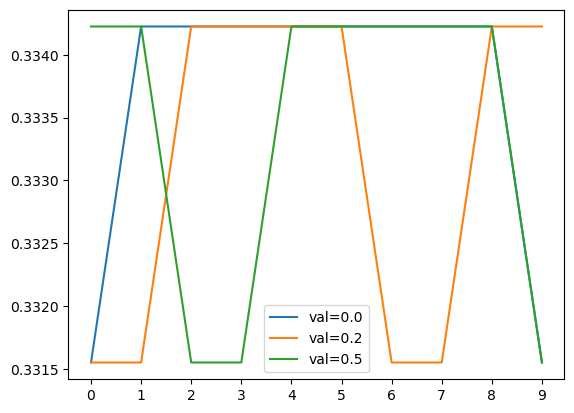

In [45]:
for droprate, hist in scores.items():
    
    #plt.plot(hist['accuracy'], label='train=%s' % lr)
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
    
plt.xticks(np.arange(10))
plt.legend()

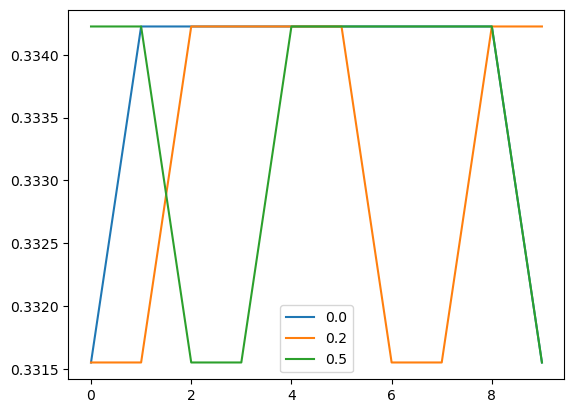

In [46]:
hist = scores[0.0]
    #plt.plot(hist['accuracy'], label='train=%s' % lr)
plt.plot(hist['val_accuracy'], label=0.0)
    
hist = scores[0.2]
    #plt.plot(hist['accuracy'], label='train=%s' % lr)
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.5]
    #plt.plot(hist['accuracy'], label='train=%s' % lr)
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()

# Data augmentation

In [47]:
train_gen = ImageDataGenerator(
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    "soft-footies-dataset/train",
    target_size=(299, 299),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    "soft-footies-dataset/validation",
    target_size=(299, 299),
    batch_size=32
)

Found 12004 images belonging to 3 classes.
Found 1496 images belonging to 3 classes.


In [48]:
learning_rate = 0.01
size = 100
droprate = 0.2

model = make_model(
        learning_rate=learning_rate, 
        size_inner=size,
        droprate=droprate
)
    
history = model.fit(
        train_ds, epochs=30, 
        validation_data=val_ds)  

Epoch 1/30
376/376 [==============================] - 222s 585ms/step - loss: 1.0992 - accuracy: 0.3313 - val_loss: 1.0988 - val_accuracy: 0.3342
Epoch 2/30
376/376 [==============================] - 221s 588ms/step - loss: 1.0993 - accuracy: 0.3362 - val_loss: 1.0996 - val_accuracy: 0.3342
Epoch 3/30
376/376 [==============================] - 219s 581ms/step - loss: 1.0992 - accuracy: 0.3291 - val_loss: 1.0986 - val_accuracy: 0.3316
Epoch 4/30
376/376 [==============================] - 222s 590ms/step - loss: 1.0995 - accuracy: 0.3240 - val_loss: 1.0988 - val_accuracy: 0.3342
Epoch 5/30
376/376 [==============================] - 221s 587ms/step - loss: 1.0995 - accuracy: 0.3237 - val_loss: 1.0988 - val_accuracy: 0.3342
Epoch 6/30
376/376 [==============================] - 221s 588ms/step - loss: 1.0991 - accuracy: 0.3334 - val_loss: 1.0990 - val_accuracy: 0.3316
Epoch 7/30
376/376 [==============================] - 221s 587ms/step - loss: 1.0994 - accuracy: 0.3291 - val_loss: 1.0988 -

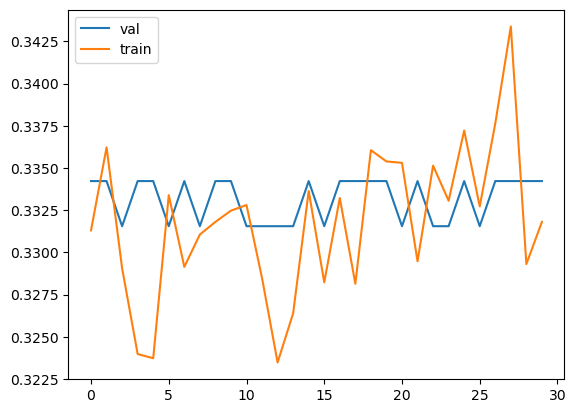

In [49]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
    

plt.legend()

# Training a Larger Model
* Train 299 x 299 size

In [50]:
def make_model(input_size=299, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    input_shape=(input_size, input_size, 3),
    include_top=False
    )
    
    base_model.trainable = False 
    
    #########################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dense(droprate)(inner)
    outputs = keras.layers.Dense(3)(drop)
    model = keras.Model(inputs, outputs) 

    #########################################
        
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )
    
    return model

In [51]:
input_size=299

In [52]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #shear_range=10.0,
    #zoom_range=0.1,
    #horizontal_flip=True 
     
)

train_ds = train_gen.flow_from_directory(
    "soft-footies-dataset/train",
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    "soft-footies-dataset/validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)


Found 12004 images belonging to 3 classes.
Found 1496 images belonging to 3 classes.


In [53]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode='max'
)

In [54]:
learning_rate = 0.01
size = 100
droprate = 0.2
input_size = 299

model = make_model(
        input_size=299,
        learning_rate=learning_rate, 
        size_inner=size,
        droprate=droprate
)
    
history = model.fit(
        train_ds, epochs=50, 
        validation_data=val_ds, callbacks=[checkpoint])  

Epoch 1/50
376/376 [==============================] - 93s 242ms/step - loss: 1.0992 - accuracy: 0.3336 - val_loss: 1.1005 - val_accuracy: 0.3316
Epoch 2/50
376/376 [==============================] - 91s 241ms/step - loss: 1.0993 - accuracy: 0.3360 - val_loss: 1.0994 - val_accuracy: 0.3342
Epoch 3/50
376/376 [==============================] - 91s 241ms/step - loss: 1.0994 - accuracy: 0.3250 - val_loss: 1.0998 - val_accuracy: 0.3316
Epoch 4/50
376/376 [==============================] - 91s 242ms/step - loss: 1.0991 - accuracy: 0.3381 - val_loss: 1.1002 - val_accuracy: 0.3316
Epoch 5/50
376/376 [==============================] - 91s 241ms/step - loss: 1.0995 - accuracy: 0.3261 - val_loss: 1.0988 - val_accuracy: 0.3316
Epoch 6/50
376/376 [==============================] - 91s 242ms/step - loss: 1.0994 - accuracy: 0.3307 - val_loss: 1.0996 - val_accuracy: 0.3342
Epoch 7/50
376/376 [==============================] - 91s 241ms/step - loss: 1.0993 - accuracy: 0.3316 - val_loss: 1.0988 - val_ac

# Using the model
* load the model
* evaluate the model
* Getting prediction

In [55]:
import tensorflow as tf
from tensorflow import keras


In [83]:
model = keras.models.load_model('xception_v1_07_0.977.h5')

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [85]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './soft-footies-dataset/test', 
    target_size=(299, 299), 
    batch_size=32, 
    shuffle=False
)

Found 1500 images belonging to 3 classes.


In [86]:
model.evaluate(test_ds) 

47/47 [==============================] - 11s 210ms/step - loss: 0.0663 - accuracy: 0.9780


[0.06631571799516678, 0.9779999852180481]

In [119]:
path = 'soft-footies-dataset/test/shoe/Shoe (100).jpg'

In [120]:
img = load_img(path, target_size=(299, 299))

In [121]:
import numpy as np

In [122]:
x = np.array(img)
X = np.array([x])
X.shape  

(1, 299, 299, 3)

In [123]:
X = preprocess_input(X)

In [124]:
pred = model.predict(X)

1/1 [==============================] - 0s 28ms/step


In [125]:
classes = [
    'boot', 
    'sandal',
    'shoe' 
]

In [126]:
dict(zip(classes, pred[0]))

{'boot': -8.185767, 'sandal': -3.757629, 'shoe': 6.2832055}

predicted correctly